<a href="https://colab.research.google.com/github/Trace-dap-troai/Chapter-2---Group-Exercise-4/blob/main/Group_Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data

print("Dataset shape:", X.shape)


Dataset shape: (569, 30)


In [3]:
#Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [4]:
#PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)



In [5]:
#K-Means Clustering
k = 2

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

print("===== K-Means Results =====")
print("Chosen k:", k)
print("Cluster counts:", np.bincount(kmeans_labels))


===== K-Means Results =====
Chosen k: 2
Cluster counts: [188 381]


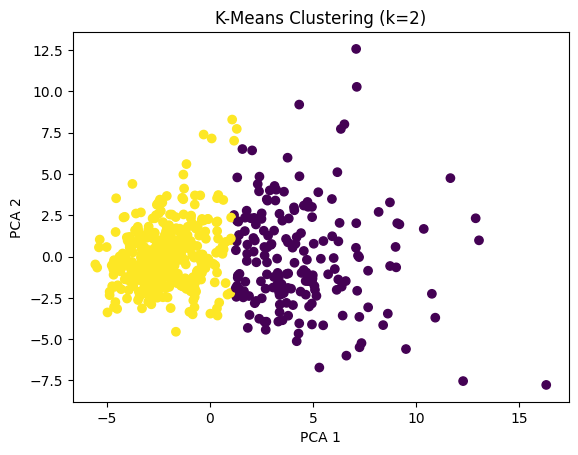

In [6]:
#Visualize K-Means
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels)
plt.title("K-Means Clustering (k=2)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()



In [7]:
#DBSCAN Clustering
eps = 0.5
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(X_scaled)

n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print("===== DBSCAN Results =====")
print("Chosen eps:", eps)
print("Chosen min_samples:", min_samples)
print("Number of clusters found:", n_clusters)
print("Number of noise points:", n_noise)



===== DBSCAN Results =====
Chosen eps: 0.5
Chosen min_samples: 5
Number of clusters found: 0
Number of noise points: 569


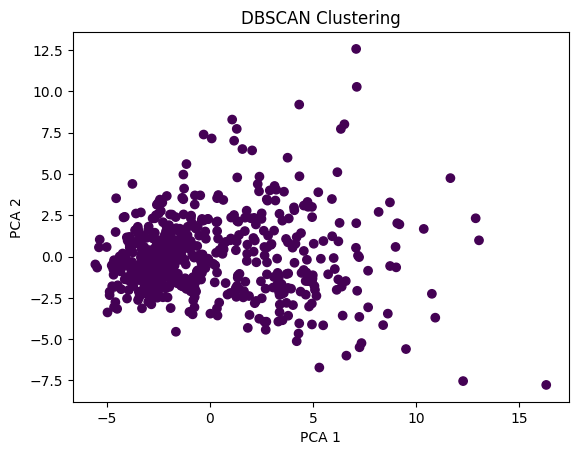

In [8]:
#Visualize DBSCAN
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels)
plt.title("DBSCAN Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()



**Analysis and Comparison**
1. Cluster Shape and Structure
K-Means creates spherical clusters based on centroids.
DBSCAN forms clusters based on density and allows arbitrary shapes.

2. Sensitivity to Noise
K-Means assigns every point to a cluster.
DBSCAN can detect noise points (label -1).

3. Suitability
K-Means works well when clusters are compact.
DBSCAN is better when data contains noise or irregular shapes.
